In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import warnings 
from ipywidgets import interact, fixed
import random
import scipy
warnings.filterwarnings("ignore") 

In [2]:
def get_random_dataset(n):
    return [random.randint(0,1000) / 10 for x in range(n)]

In [3]:
def plot_distribution(y, extra_points = [], plot=sns.stripplot, size=(10,1), set_lims=True):
    plt.figure(figsize=size)

    ax = plot(y)
    sns.rugplot(y)
    
    for x, color in extra_points:
        ax.add_line(Axes.axvline(ax, x=x, c=color))
    
    if set_lims:
        plt.xlim((0,100))
    plt.title("Distribution of Values")
    plt.xlabel("value");
    
    plt.show()

In [4]:
def plot_random(n):
    y = get_random_dataset(n)
    plot_distribution(y)
    print(y)

# Week 2 Discussion
DSC 40A

Sujith Chappidi

# Other Loss Functions in Code

In [5]:
def incorrect_loss(y, h):
    loss = 0
    for y_i in y:
        if y_i != h:
            loss += 1
    return loss    

In [6]:
def furthest_point_loss(y, h):
    return max(abs(max(y)-h), abs(min(y)-h))

## Total Absolute Distance
Sum of absolute distances between all points and h

In [7]:
def mae_loss(y, h):
    loss = 0
    for y_i in y:
        loss += abs(y_i - h)
    
    return loss

In [8]:
def fast_mae_loss(y, h):
    return sum([abs(y_i - h) for y_i in y])

## Total Squared Distance
Sum of squared distances between all points and h

In [9]:
def mse_loss(y, h):
    loss = 0
    for y_i in y:
        loss += (y_i - h) ** 2
    
    return loss

In [10]:
def fast_mse_loss(y, h):
    return sum([(y_i - h) ** 2 for y_i in h])

In [11]:
loss_functions = {"number incorrect" : incorrect_loss, "furthest distance" : furthest_point_loss, "total absolute distance" : mae_loss, "total squared distance" : mse_loss}

# Cereal Dataset

In [12]:
cereal = pd.read_csv("data/cereal.csv").set_index('name')
cereal.shape

(77, 15)

In [13]:
cereal = cereal.sort_values("calories", ascending=False)
cereal

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
Mueslix Crispy Blend,K,C,160,3,2,150,3.0,17.0,13,160,25,3,1.50,0.67,30.313351
Muesli Raisins; Dates; & Almonds,R,C,150,4,3,95,3.0,16.0,11,170,25,3,1.00,1.00,37.136863
Muesli Raisins; Peaches; & Pecans,R,C,150,4,3,150,3.0,16.0,11,170,25,3,1.00,1.00,34.139765
Total Raisin Bran,G,C,140,3,1,190,4.0,15.0,14,230,100,3,1.50,1.00,28.592785
Just Right Fruit & Nut,K,C,140,3,1,170,2.0,20.0,9,95,100,3,1.30,0.75,36.471512
Nutri-Grain Almond-Raisin,K,C,140,3,2,220,3.0,21.0,7,130,25,3,1.33,0.67,40.692320
Oatmeal Raisin Crisp,G,C,130,3,2,170,1.5,13.5,10,120,25,3,1.25,0.50,30.450843
Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
Post Nat. Raisin Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594


In [14]:
y = cereal['calories']

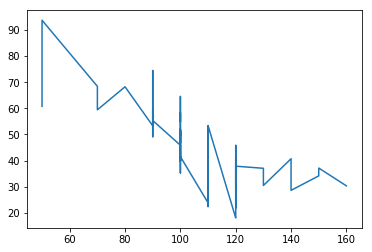

In [15]:
plt.plot(cereal['calories'],cereal['rating'])

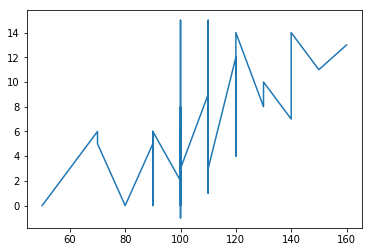

In [16]:
plt.plot(cereal['calories'],cereal['sugars'])

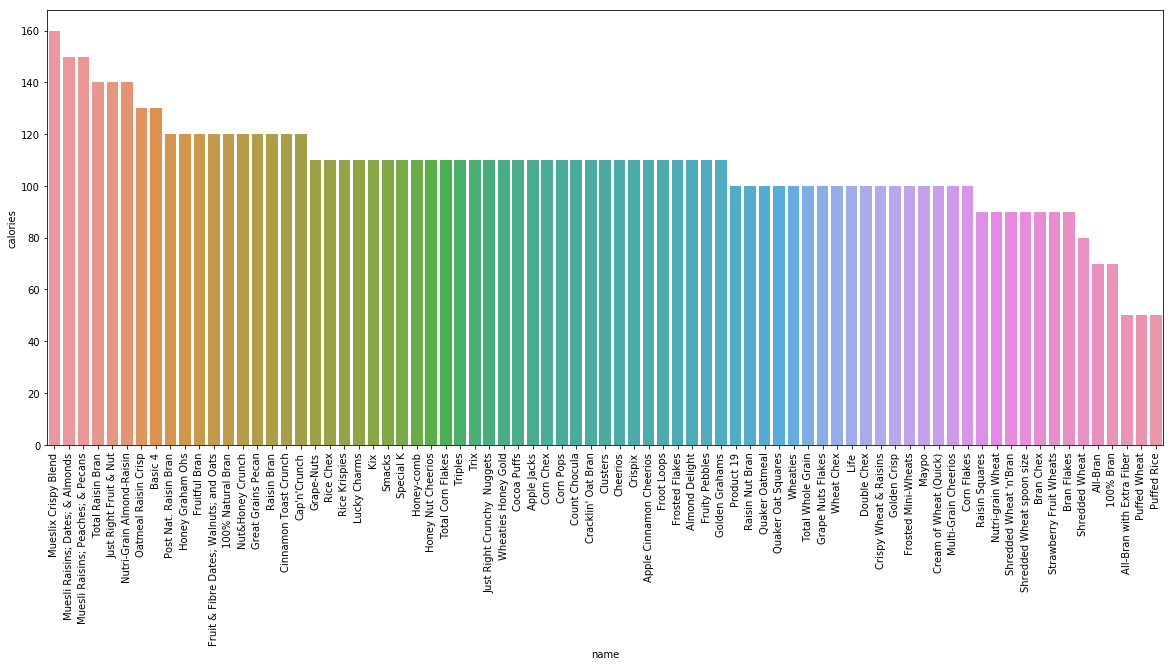

In [17]:
plt.figure(figsize=(20,8))
sns.barplot(cereal.index, y)
plt.xticks(rotation="vertical");

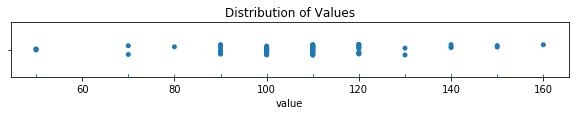

In [18]:
plot_distribution(y,set_lims=False)

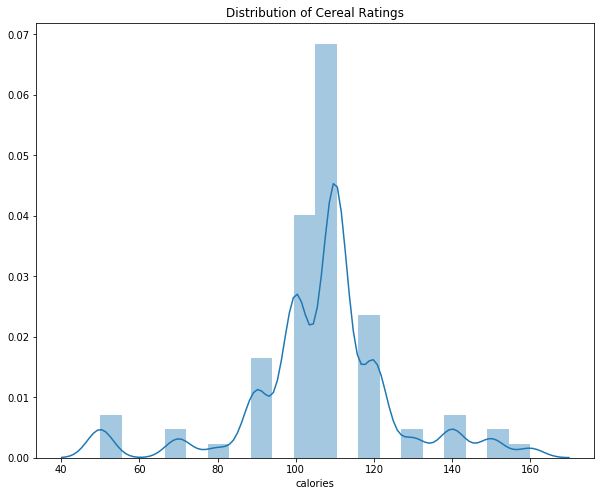

In [19]:
plt.figure(figsize = (10,8))
sns.distplot(y, bins=20)
plt.title("Distribution of Cereal Ratings");

## Loss with Cereal Dataset

What are the minimums?

Can we compare loss values between loss functions? What about within loss funtions?

In [20]:
def plot_guess(loss, h, y):
    plt.figure(figsize=(10,1))
    ax = sns.stripplot(y)
    ax.add_line(Axes.axvline(ax, x=h, c="red"))
    plt.show()
    print("Loss: {}".format(loss(y, h)))

In [21]:
interact(plot_guess, loss = loss_functions, h=(0,200,1), y=fixed(y));

interactive(children=(Dropdown(description='loss', options={'number incorrect': <function incorrect_loss at 0x…

high values of loss are not "bad". cant compare loss values between loss functions

# Plotting Loss Functions

In [22]:
def plot_loss(alpha, loss, y):
    x = np.arange(0,200,alpha)
    losses = [loss(y, x_i) for x_i in x]
    min_x = 0
    max_loss = 10000000
    for x_i in x:
        if(loss(y,x_i)<max_loss):
            max_loss=loss(y,x_i)
            min_x=x_i
    plt.scatter(x, losses)
    plt.title("{} for Dataset".format(loss.__name__))
    plt.xlabel('h')
    plt.ylabel('loss');
    print("Minimum Loss is",min(losses)," and occurs at ",min_x)

## Plotting Loss for Cereal Dataset

What are the minimums?

Can we compare loss values between loss functions? What about within loss funtions?

In [23]:
interact(plot_loss, loss=loss_functions, alpha=(.5,10,.5), y=fixed(y));

interactive(children=(FloatSlider(value=5.0, description='alpha', max=10.0, min=0.5, step=0.5), Dropdown(descr…

# Minimizing Loss

Minimized Number Incorrect Loss:

In [24]:
# statistics.mode(y) fails because there are multiple modes
def mode(y):
    counts = [(y_i, list(y).count(y_i)) for y_i in y]
    counts.sort(key = lambda x: x[1], reverse=True)
    return counts[0][0]

mode(y)

110

Minimized Furthest Distance Loss:

In [25]:
def midrange(y):
    return (max(y) + min(y)) / 2

midrange(y)

105.0

Minimized Total Absolute Distance:

In [26]:
def median(y):
    if len(y) % 2 == 0:
        return (y[int(len(y)/2) - 1] + y[int(len(y)/2)]) / 2
    return y[int((len(y) - 1)/2)]

median(y)

110

Minimized Total Squared Distance:

In [27]:
def mean(y):
    return sum(y) / len(y)

mean(y)

106.88311688311688

## Which of the minimized loss functions produces the best h?

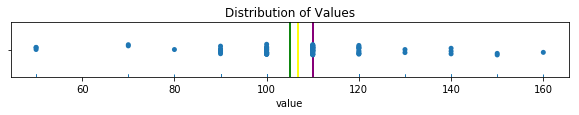

In [28]:
plot_distribution(y, extra_points = [(mode(y), "red"), (midrange(y), "green"), (median(y), "purple"), (mean(y), "yellow")],set_lims=False)

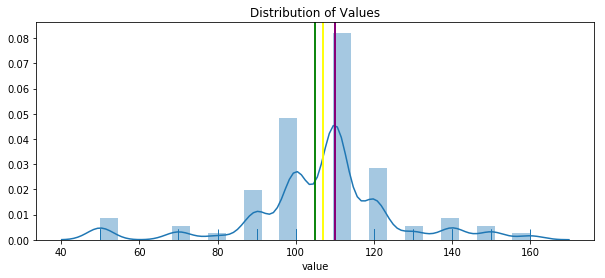

In [29]:
plot_distribution(y, extra_points = [(mode(y), "red"), (midrange(y), "green"), (mean(y), "yellow"), (median(y), "purple")], 
                  plot = sns.distplot, size = (10,4),set_lims=False)

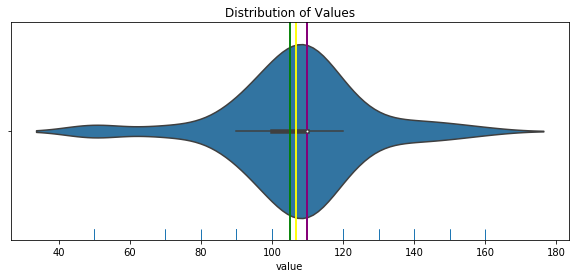

In [30]:
plot_distribution(y, extra_points = [(mode(y), "red"), (midrange(y), "green"), (mean(y), "yellow"), (median(y), "purple")],
                 set_lims=False, plot=sns.violinplot, size=(10,4))

# Other Datasets

In [31]:
y = list(np.random.normal(10,1,30)) + list(np.random.normal(20,1,10))

### 1) Which of the minimized loss functions produces the best h?

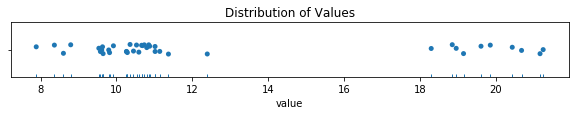

In [32]:
plot_distribution(y, set_lims=False)

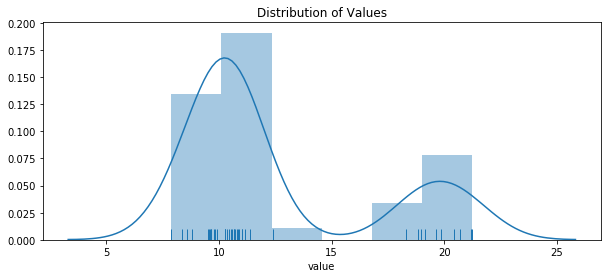

In [33]:
plot_distribution(y, set_lims=False, plot=sns.distplot, size=(10,4))

In [34]:
np.array(y)

array([  9.53514229,  10.35792901,  10.68578215,  10.87454593,
        11.36992938,  10.28667708,   7.88404769,   9.79516559,
        10.85084725,  10.44833985,  11.01695795,  10.73356793,
         8.60114291,   9.91956754,   9.63152911,  10.26314393,
        11.01857051,  10.66303068,   9.81750381,  12.39369133,
         9.64722682,  10.58950114,  10.79803665,  10.52789094,
        11.14118682,   9.57653546,   9.61087825,  10.2664958 ,
         8.36250383,   8.79298966,  18.85370899,  19.85665817,
        19.15117578,  19.61191549,  18.29886138,  18.95763582,
        21.16856054,  21.25093716,  20.68106743,  20.43568795])

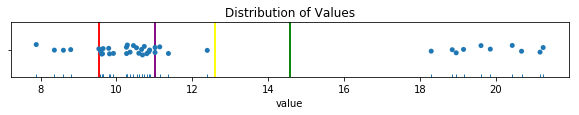

In [35]:
plot_distribution(y, extra_points = [(mode(y), "red"), (midrange(y), "green"), (mean(y), "yellow"), (median(y), "purple")],
                 set_lims=False)

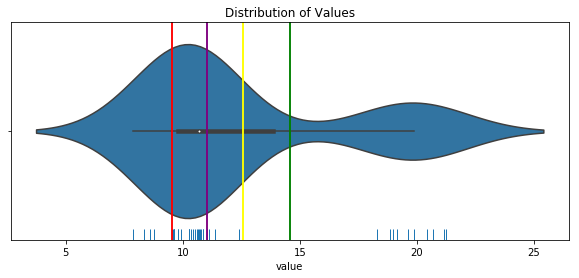

In [36]:
plot_distribution(y, extra_points = [(mode(y), "red"), (midrange(y), "green"), (mean(y), "yellow"), (median(y), "purple")],
                 set_lims=False, plot=sns.violinplot, size=(10,4))

### 2) Which of the minimized loss functions produces the best h?

In [37]:
y = list(np.random.normal(0,1,10)) + [100]

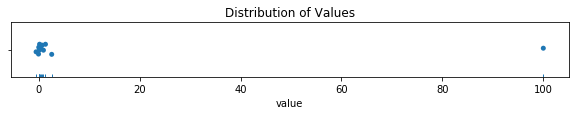

In [38]:
plot_distribution(y, set_lims=False)

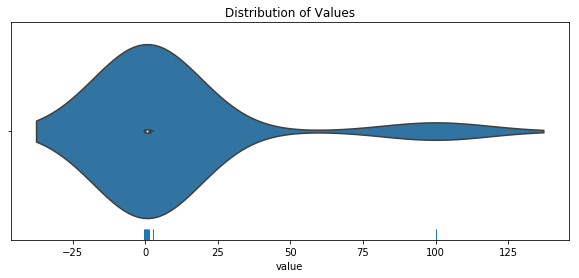

In [39]:
plot_distribution(y, set_lims=False, plot=sns.violinplot, size=(10,4))

In [40]:
np.array(y)

array([  1.34513671e+00,   9.44157901e-01,   1.54039127e-01,
         1.35654138e-02,   2.58185584e+00,  -5.11643232e-01,
        -3.07202696e-02,   6.79871741e-01,   1.78129593e-01,
         4.67328592e-01,   1.00000000e+02])

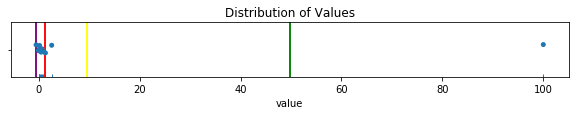

In [41]:
plot_distribution(y, extra_points = [(mode(y), "red"), (midrange(y), "green"), (mean(y), "yellow"), (median(y), "purple")],
                 set_lims=False)

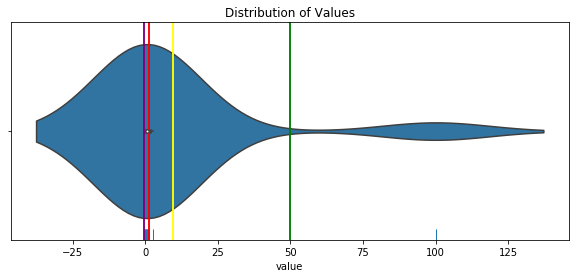

In [42]:
plot_distribution(y, extra_points = [(mode(y), "red"), (midrange(y), "green"), (mean(y), "yellow"), (median(y), "purple")],
                 set_lims=False, plot=sns.violinplot, size=(10,4))

### 3) Which of the minimized loss functions produces the best h?

In [43]:
y = random.choices([1,1,1,1,1,1,20,6,10,15,13],k=30)

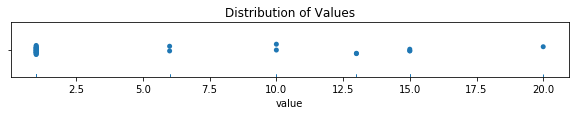

In [44]:
plot_distribution(y, set_lims=False)

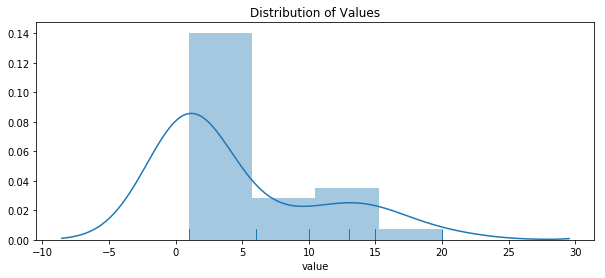

In [45]:
plot_distribution(y, set_lims=False, plot=sns.distplot, size=(10,4))

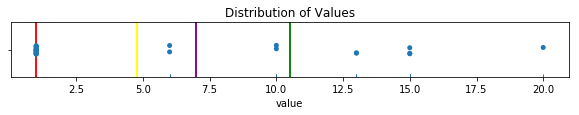

In [46]:
plot_distribution(y, extra_points = [(mode(y), "red"), (midrange(y), "green"), (mean(y), "yellow"), (median(y), "purple")],
                 set_lims=False)

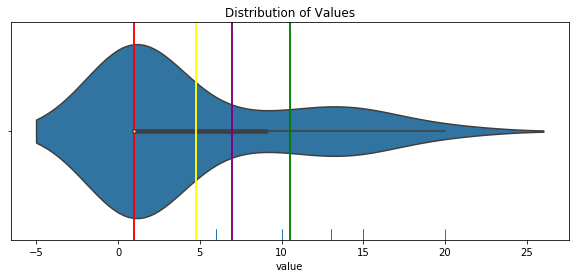

In [47]:
plot_distribution(y, extra_points = [(mode(y), "red"), (midrange(y), "green"), (mean(y), "yellow"), (median(y), "purple")],
                 set_lims=False, plot=sns.violinplot, size=(10,4))

# New Loss Function: Huber

## Huber Loss

* Combines total squared distance and total absolute distance
* Somewhat of a best of both worlds situation

Huber Loss uses the total squared distance for values close to h and total absolute distance for values further away.

### Why?
* Absolute distance is resistant to outliers
    * Outliers are typically far away from minimized loss values
* Squared distance is sensitive close to right prediction
    * The "u" shape is less harsh than the "v" once it gets close

### How?
We assign some delta value that determines how far away from h we switch from using total squared distance to total absolute distance

### Formula:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/21983befe82b2509d1bb8dfa1064a35b6031d508" height=800 width=1500>

In [48]:
def huber_loss(y, h, delta):
    loss = 0
    for y_i in y:
        resid = abs(y_i-h)
        
        if resid <= delta:
            loss += (.5 * (resid ** 2))
        else:
            loss += (delta * resid) - (.5 * delta ** 2)
            
    loss /= len(y)
    
    return loss

In [49]:
def plot_huber_loss(delta, y, xlim):
    x = np.arange(xlim[0],xlim[1],(xlim[1] - xlim[0]) / 1000)
    losses = [huber_loss(y, x_i, delta) for x_i in x]
    
    plt.plot(x, losses)
    plt.title("Huber Loss for Cereal Dataset")
    plt.xlabel('h')
    plt.ylabel('loss');

In [50]:
y = [5]

In [51]:
interact(plot_huber_loss, delta=(.5,20,1), y=fixed(y), xlim=fixed((0,10)));

interactive(children=(FloatSlider(value=9.5, description='delta', max=20.0, min=0.5, step=1.0), Output()), _do…

In [52]:
scipy.optimize.minimize(lambda h: huber_loss(y, h, 1), x0=0)

      fun: 0.0
 hess_inv: array([[1]])
      jac: array([  7.45058060e-09])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([ 5.])

In [53]:
interact(lambda delta: scipy.optimize.minimize(lambda h: huber_loss(y, h, delta), x0 = 0).x, delta = (.5,20,.5));

interactive(children=(FloatSlider(value=10.0, description='delta', max=20.0, min=0.5, step=0.5), Output()), _d…

## Huber Loss: Cereal Dataset

In [54]:
y = pd.read_csv("data/cereal.csv").set_index('name')['calories']

In [55]:
interact(plot_huber_loss, delta=(.5,20,1), y=fixed(y), xlim=fixed((0,200)));

interactive(children=(FloatSlider(value=9.5, description='delta', max=20.0, min=0.5, step=1.0), Output()), _do…

In [56]:
interact(lambda delta: scipy.optimize.minimize(lambda h: huber_loss(y, h, delta), x0 = 0).x, delta = (.5,50,.5));

interactive(children=(FloatSlider(value=25.0, description='delta', max=50.0, min=0.5, step=0.5), Output()), _d…

In [62]:
# Not covered today

In [76]:
# imports
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
import pandas as pd
import numpy as np

import time, math, statistics, random, scipy

from ipywidgets import interact, fixed

from scipy.stats import skewnorm

%matplotlib inline

# Measure of Spread

In [77]:
y1 = list(np.random.normal(0,1,100))
y2 = list(np.random.normal(0,5,100))

In [58]:
def plot_distribution(y, name, extra_points = [], plot=sns.stripplot, size=(10,1), lims=True):
    plt.figure(figsize=size)

    ax = plot(y)
    sns.rugplot(y)
    
    for x, color in extra_points:
        ax.add_line(Axes.axvline(ax, x=x, c=color))
    
    if lims:
        plt.xlim((-20,20))
    plt.title("Distribution of Values For {}".format(name))
    plt.xlabel("value");
    
    plt.show()

## Example Datasets:

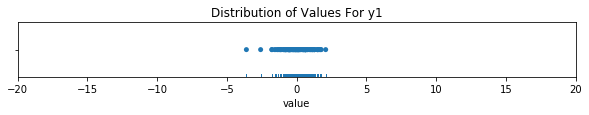

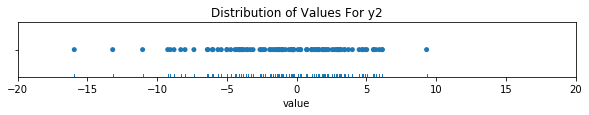

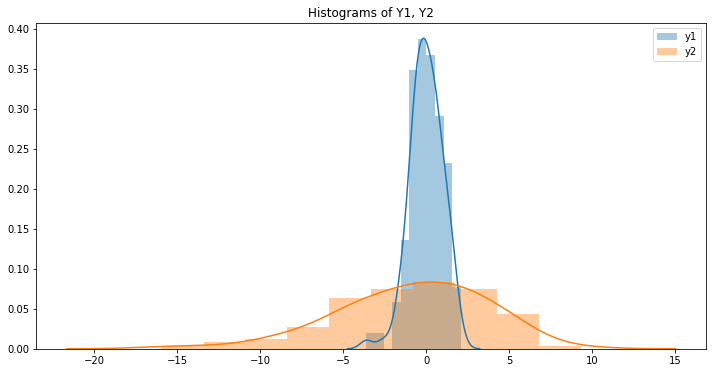

In [59]:
plot_distribution(y1, "y1")
plot_distribution(y2, "y2")

plt.figure(figsize=(12,6))
sns.distplot(y1); sns.distplot(y2); plt.legend(["y1", "y2"]); plt.title("Histograms of Y1, Y2");

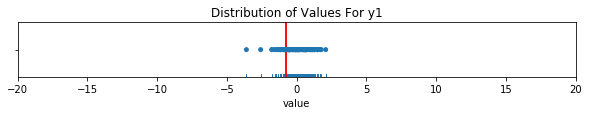

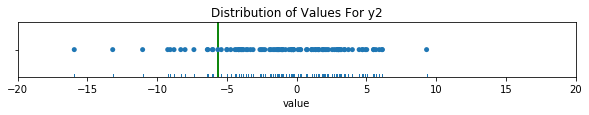

In [60]:
plot_distribution(y1, "y1", extra_points=[(y1[0], "red")])
plot_distribution(y2, "y2", extra_points=[(y2[0], "green")]) 

In [61]:
# Mode could be any value
print("Number incorrect loss for y1: {} \nNumber incorrect loss for y2: {}".format(
    incorrect_loss(y1, y1[0]), incorrect_loss(y2, y2[0])))

Number incorrect loss for y1: 99 
Number incorrect loss for y2: 99


## What is this value telling us?

### A: How many values aren't the mode

In [62]:
midrange1 = (min(y1) + max(y1)) / 2
midrange2 = (min(y2) + max(y2)) / 2

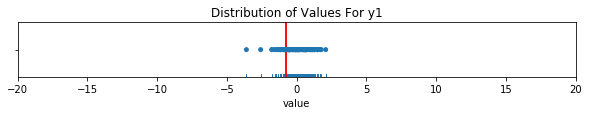

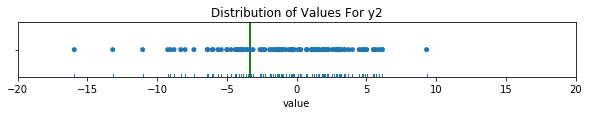

In [63]:
plot_distribution(y1, "y1", extra_points=[(midrange1, "red")])
plot_distribution(y2, "y2", extra_points=[(midrange2, "green")])

In [64]:
print("Furthest point loss for y1: {} \nFurthest point loss for y2: {}".format(
    furthest_point_loss(y1, midrange1), furthest_point_loss(y2, midrange2)))

Furthest point loss for y1: 2.8415150585324955 
Furthest point loss for y2: 12.62782259514487


## What is this value telling us?

### A: 1/2 * range

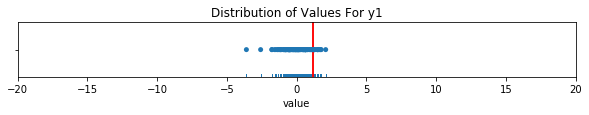

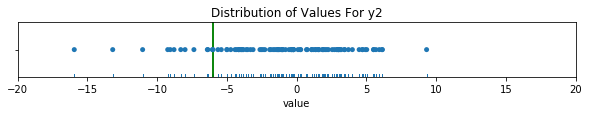

In [65]:
plot_distribution(y1, "y1", extra_points=[(median(y1), "red")])
plot_distribution(y2, "y2", extra_points=[(median(y2), "green")])

In [66]:
print("Loss for y1: {}\nLoss for y2: {}".format(mae_loss(y1, median(y1)), mae_loss(y2, median(y2))))

Loss for y1: 123.77775893774968
Loss for y2: 586.0236238903206


## What is this value telling us?

### A: mean absolute deviation from the median

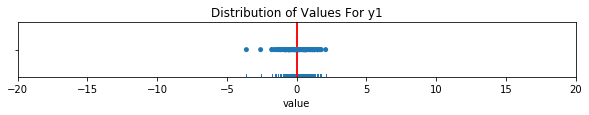

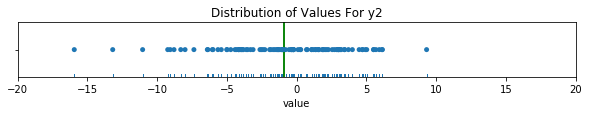

In [67]:
plot_distribution(y1, "y1", extra_points=[(mean(y1), "red")])
plot_distribution(y2, "y2", extra_points=[(mean(y2), "green")])

In [68]:
print("Loss for y1: {}\nLoss for y2: {}".format(mse_loss(y1, mean(y1)), mse_loss(y2, mean(y2))))

Loss for y1: 94.34944225367148
Loss for y2: 2015.7994858161314


## What is this value telling us?

### A: mean squared deviation from the mean (AKA Variance)

# Measuring Skew

In [69]:
skewed = skewnorm.rvs(10, size=500)

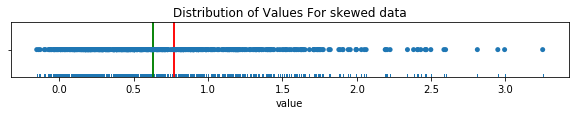

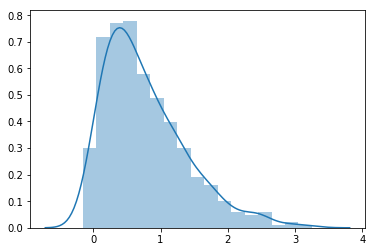

In [70]:
plot_distribution(skewed, "skewed data", lims=False, extra_points=[
    (statistics.mean(skewed), "red"), (statistics.median(skewed), "green")])
sns.distplot(skewed);

### What kind of skew is this?

### A: long right tailed/right skewed

## One of the better ways of measuring skew:
![skew](./data/skew.png "Formula")

### What do the resulting values mean?

negative: left skewed

positive: right skewed

0: no skew

In [71]:
def skew(y):
    mean = sum(y) / len(y)
    sd = statistics.stdev(skewed) # how would you code this without the built in function
    return sum([((y_i - mean) / sd) **3 for y_i in skewed]) / len(skewed)

skew: 1.0882483724077836


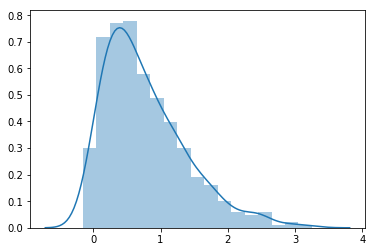

In [72]:
sns.distplot(skewed)
print("skew:", skew(skewed))

# Different Skews

In [73]:
skewed = skewnorm.rvs(0, size=500)

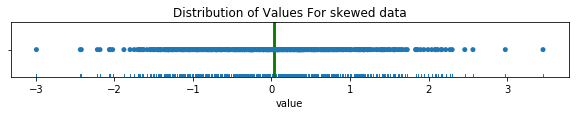

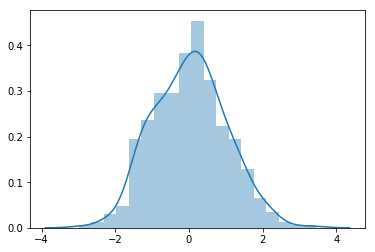

In [74]:
plot_distribution(skewed, "skewed data", lims=False, extra_points=[
    (statistics.mean(skewed), "red"), (statistics.median(skewed), "green")])
sns.distplot(skewed);

In [75]:
print("skew:", skew(skewed))

skew: 0.13086035390785275


In [76]:
skewed = skewnorm.rvs(-10, size=500)

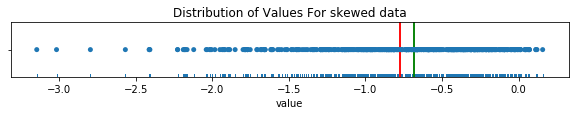

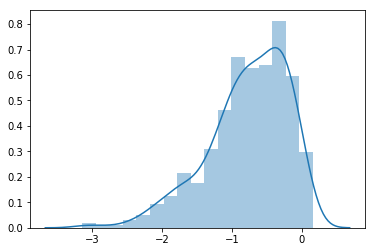

In [77]:
plot_distribution(skewed, "skewed data", lims=False, extra_points=[
    (statistics.mean(skewed), "red"), (statistics.median(skewed), "green")])
sns.distplot(skewed);

In [78]:
print("skew:", skew(skewed))

skew: -0.9305340730949627
